# EDA: Lending Club

# Data Understanding:

In [1]:
# Importing Python libraries for input and manipulate Data  and Ploting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv('loan.csv', dtype='unicode')
raw_data.shape

(39717, 111)

In [2]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


# The object is to identify predictors of default so during loan application we can use those variables for loan approval/rejection.

There are broadly three types of varaibles:

1- Demographic Variables: Those who related to the applicant like: Age, Occupation, Employment details etc.

2- Loan Characteristics: Amount of loan, Interest rate, Purpose of loan etc.

3- Customer Behaviour: These are generated after the loan is approved like: Delinquent 2 years, Resolving Balance, Recoveries etc., So we can ignore them.

Below are the Customer Behaviour Variables which are not require as of now:

delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp,total_rec_int,total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, application_type

For column name 'loan_status' having values as 'current' are neither fully paid or defaulted, So we can remove them and only use 'Fully paid' and 'charger off'. 

# Data Cleaning and Manipulation

In [3]:
# Remove all the Customer Behaviour Variables
customer_behaviour = ['delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'next_pymnt_d',
'last_credit_pull_d',
'application_type'
];

raw_data = raw_data.drop(columns=customer_behaviour)
raw_data.shape

(39717, 89)

In [4]:
# Find and print the columns having all values as NaN
columns_null = raw_data.columns[raw_data.isnull().all()].tolist()
print(columns_null)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [5]:
# Removing the columns having all values as NaN
raw_data = raw_data.drop(columns=columns_null)
raw_data.shape

(39717, 35)

In [6]:
# Find and print the columns which have unique value
raw_data_unique = raw_data.apply(pd.Series.nunique)
single_value = raw_data_unique[raw_data_unique == 1].index.tolist()
print(single_value)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [7]:
# Remove the columns have single values as it's make any difference
raw_data = raw_data.drop(columns=single_value)
raw_data.shape

(39717, 27)

In [8]:
# Removing the unwanted url path from column 'url' as it's contains 'loan_id'
# Validating Column 'url' and 'id' have unique values
raw_data['url'] = raw_data['url'].map(lambda x: x.lstrip('https://lendingclub.com/browse/loanDetail.action?loan_id='))
raw_data['url'].equals(raw_data['id'])

True

# Modifying existing variables for Data Analysis:

In [9]:
# Renaming the Column 'id' with 'loan_id'
raw_data = raw_data.rename(columns={'id': 'loan_id'})
# Removing columns names as 'url','title','desc' and 'zip_code' as it's not require as of now as these will not be associated in identifying defaults.
raw_data.drop(['url','title','desc','zip_code'], axis=1, inplace=True)
raw_data.shape

(39717, 23)

In [10]:
# Considering only 'Fully Paid' and 'Charged Off' Loans for analysis and removing rows with 'Current'
loan_data = raw_data[raw_data.loan_status != 'Current']
loan_data.shape

(38577, 23)

In [11]:
# Checking the Columns and there values count
{col:loan_data[col].nunique() for col in loan_data.columns}

{'loan_id': 38577,
 'member_id': 38577,
 'loan_amnt': 870,
 'funded_amnt': 1019,
 'funded_amnt_inv': 8050,
 'term': 2,
 'int_rate': 370,
 'installment': 15022,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28027,
 'emp_length': 11,
 'home_ownership': 5,
 'annual_inc': 5215,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 2,
 'purpose': 14,
 'addr_state': 50,
 'dti': 2853,
 'mths_since_last_delinq': 95,
 'mths_since_last_record': 111,
 'pub_rec_bankruptcies': 3}

In [15]:
# Converting Employee Length 'emp_length' to numerical values
loan_data['emp_length'].fillna("< 1 year",inplace= True)
dict_emp_length = {'10+ years':10, '6 years':6, '4 years':4, '< 1 year':0, '2 years':2,'9 years':9, '5 years':5, '3 years':3, '7 years':7, '1 year':1,'8 years':8}
loan_data['emp_length'].replace(dict_emp_length, inplace=True)

In [16]:
loan_data['emp_length'].head()

0    10
1     0
2    10
3    10
5     3
Name: emp_length, dtype: int64

In [22]:
# Creating another column name as 'issue_year' for storing Year of loan issued
pd.options.mode.chained_assignment = None
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y', yearfirst=False)

loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
5    2011
Name: issue_year, dtype: int64

In [23]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_id                 38577 non-null  object        
 1   member_id               38577 non-null  object        
 2   loan_amnt               38577 non-null  object        
 3   funded_amnt             38577 non-null  object        
 4   funded_amnt_inv         38577 non-null  object        
 5   term                    38577 non-null  object        
 6   int_rate                38577 non-null  object        
 7   installment             38577 non-null  object        
 8   grade                   38577 non-null  object        
 9   sub_grade               38577 non-null  object        
 10  emp_title               36191 non-null  object        
 11  emp_length              38577 non-null  int64         
 12  home_ownership          38577 non-null  object

In [24]:
# Converting the 'Loan Amount' and 'Annual Income' to Numeric values for further analysis
loan_data['loan_amnt'] = pd.to_numeric(loan_data['loan_amnt'])
loan_data['annual_inc'] = pd.to_numeric(loan_data['annual_inc'])

In [26]:
# If the DataFrame has a MultiIndex, this method can remove one or more levels
loan_data = loan_data.reset_index(drop=True)

In [27]:
# Creating a new Column 'Loan to Anual Income' for determining defaults
loan_data['loan_to_ai'] = round(loan_data['loan_amnt']/loan_data['annual_inc'],2)
round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
loan_data.shape

(38577, 25)

# Data analysis 

# Plotting Bars for Visual representation

In [28]:
# Function for represent a graphicsal view for all the values

sns.set(style="darkgrid")

def plot_loan(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(loan_data)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="tab10")
    plt.title(title)
    plt.xlabel(x_label)

    # Twin axis
    ax2=ax.twinx()

    # Migrating Frequency on left and count axis on right side
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Switching the lable bars
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # Text alignment

    # Turning grid to ax2 off
    ax2.grid(None)
    

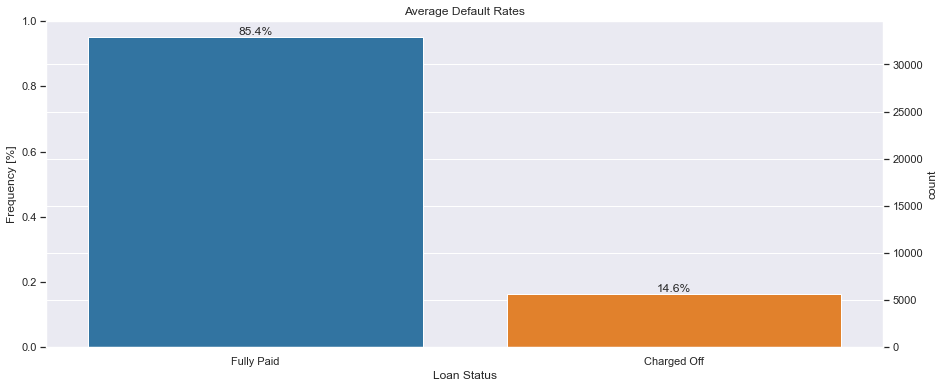

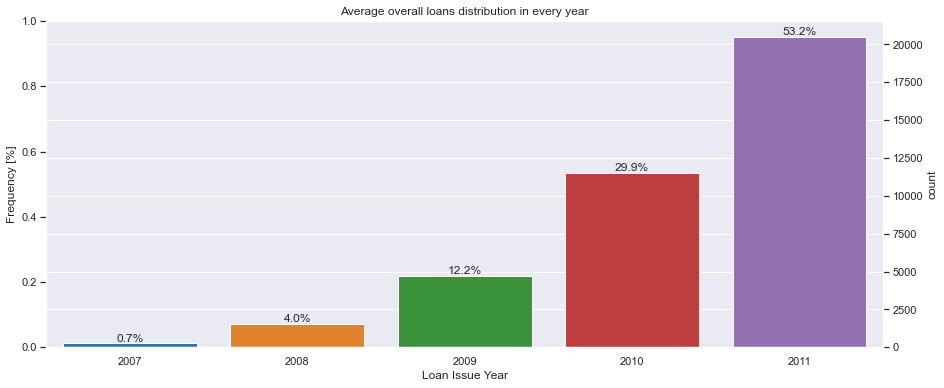

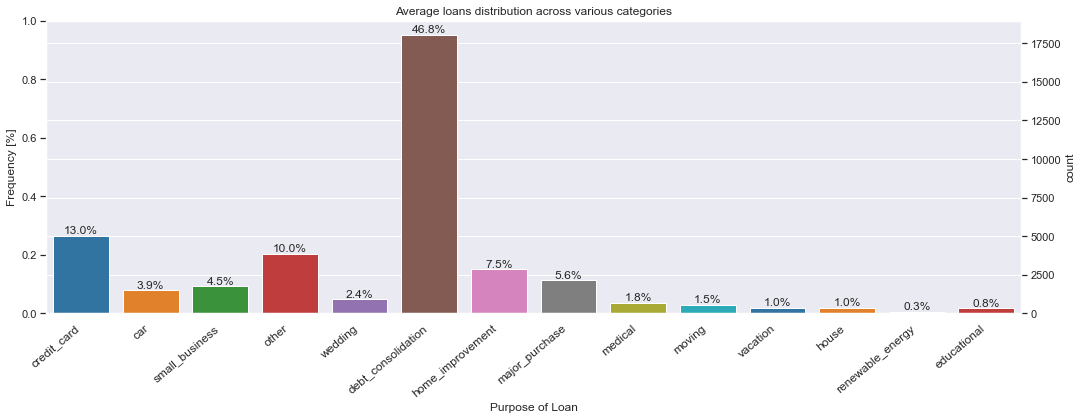

In [32]:
# Plot bars for each values for further interogation 
plot_loan("loan_status",loan_data,'Loan Status','Average Default Rates')
plot_loan("issue_year",loan_data,'Loan Issue Year','Average overall loans distribution in every year')
plot_loan("purpose",loan_data,'Purpose of Loan','Average loans distribution across various categories',None,1)

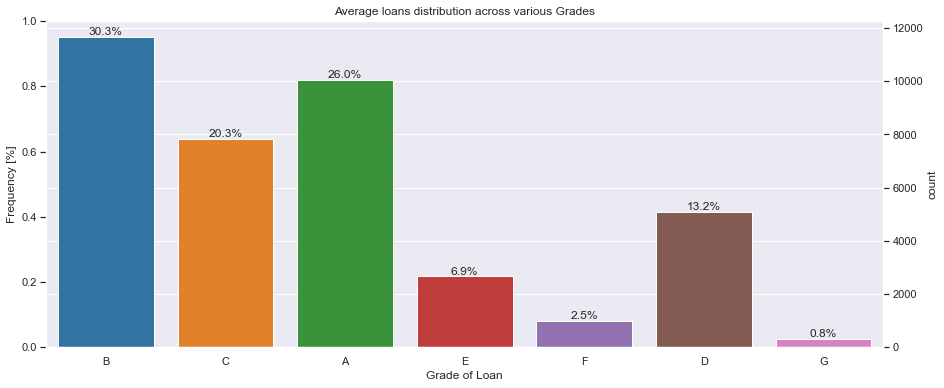

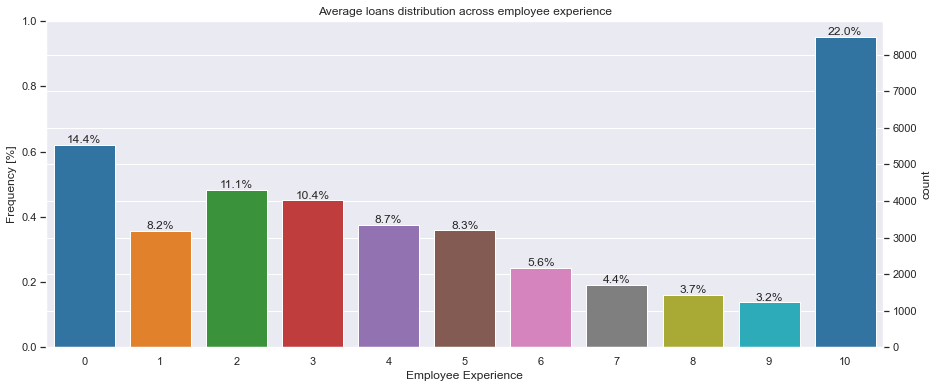

In [33]:
plot_loan("grade",loan_data,'Grade of Loan','Average loans distribution across various Grades')
plot_loan("emp_length",loan_data,'Employee Experience','Average loans distribution across employee experience')

# Vision/Highlights from above plots

#### Average default rate across all categories is 14.6%
#### Average overall distribution of loans is increasing every year
#### Peoples having 1 year and 10 years of experience are taking loans more frequently

Below 6 categories where maximum loan applications have been received and hence high is the defaulting probability in these 
categories.For better analysis limiting our analysis on top 6 loan categories:

* debt_consolidation
* credit_card
* other
* home_improvement
* major_purchase
* small_business

#### Binning: Filtering the data for these categories and derive new variables for our analysis:

#### DTI Range variable: Higher the dti ratio, lesser chances of loan getting accepted:
* dti<10(low), dti>10 and dt<20 (medium) else high

#### Loan-to-Income range variable: Higher the ratio more chances of defaulting:
* loan_to_ai<0.1(low), >0.1 and <0.2 (medium) , >0.2 (high)

#### Experience category:
* <3 years (junior) , between 3 - 7 years (middle) , >7 years (senior)

In [38]:
loan_data['dti'] = pd.to_numeric(loan_data['dti'])

In [39]:
def dti_range_calc(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'
        
def loan_to_annual_income_range_calc(loan_to_ai):
    if loan_to_ai <= 0.10:
        return 'low'
    elif (loan_to_ai >0.10 and loan_to_ai <= 0.20):
        return 'medium'
    else:
        return 'high'

def experience_level(emp_length):
    if emp_length <= 3:
        return 'Junior'
    elif (emp_length >3 and emp_length <= 7):
        return 'Middle'
    else:
        return 'Senior'
    
category_list = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business']
loan_data = loan_data.query('purpose == @category_list')
loan_data['dti_range'] = loan_data['dti'].apply(lambda x : dti_range_calc(x) )
loan_data['loan_to_ai_range'] = loan_data['loan_to_ai'].apply(lambda x : loan_to_annual_income_range_calc(x) )
loan_data['exp_level'] = loan_data['emp_length'].apply(lambda x : experience_level(int(x)))
loan_data['int_rate_float'] = loan_data['int_rate'].apply(lambda x : float(x.replace('%','')))

### Univariate Analysis on new derived variables and on filtered data

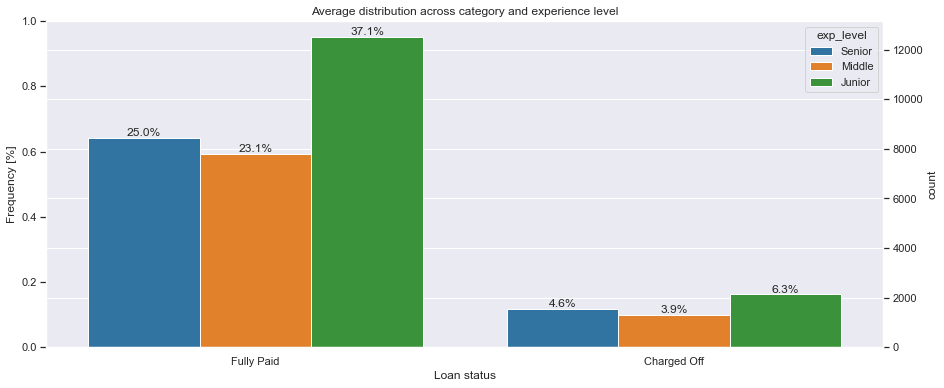

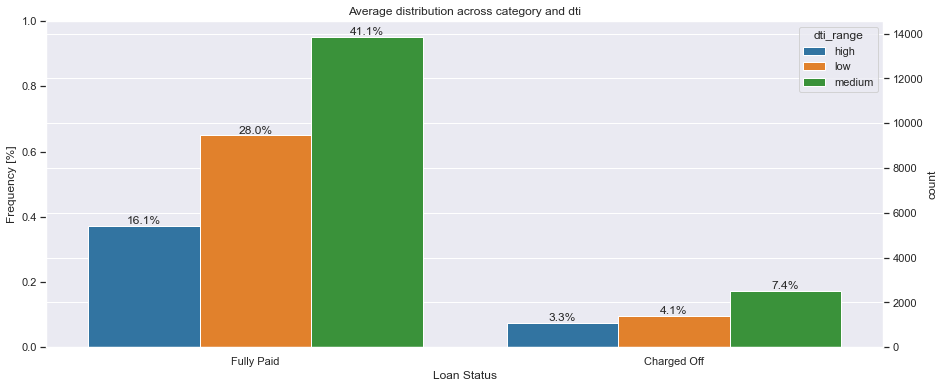

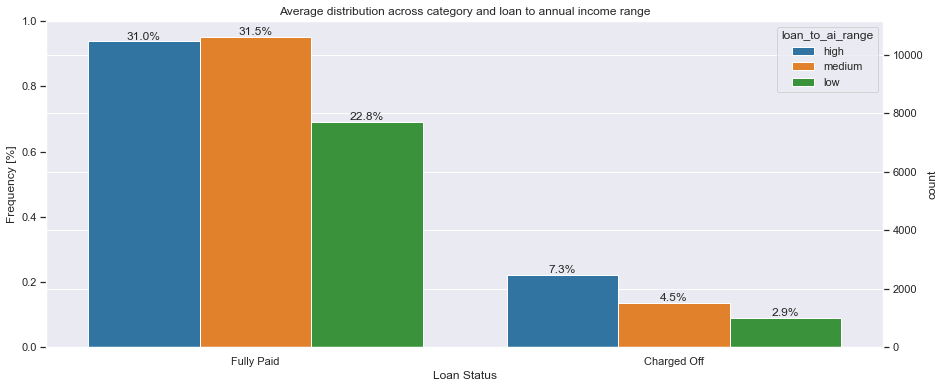

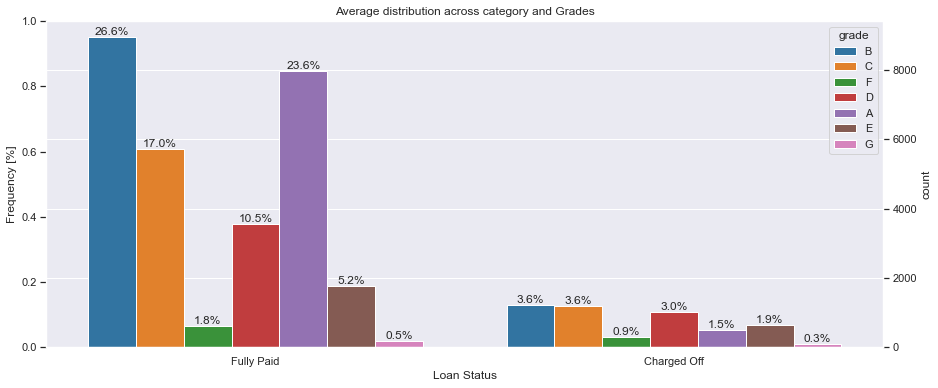

In [41]:
plot_loan("loan_status",loan_data,'Loan status','Average distribution across category and experience level','exp_level')
plot_loan("loan_status",loan_data,'Loan Status','Average distribution across category and dti','dti_range')
plot_loan("loan_status",loan_data,'Loan Status','Average distribution across category and loan to annual income range','loan_to_ai_range')
plot_loan("loan_status",loan_data,'Loan Status','Average distribution across category and Grades','grade')

## Vision/Highlights from above plots:

#### People with less experience have high chance of default
#### People lying in medium dti range have high chances of default 
#### People who have high loan to annual income ratio are at high risk of default
#### Grades B, C and D are at high probability of defaulting

## Bivariate Analysis on new derived variables and on filtered data
#### Checking how house ownership and verified source of income affect the analysis and if they can give some insights about loan Defaulting

In [42]:
# Clean the Verification Status column as Verified and Source Verified into one value as Verified and all other values as Not Verified.
loan_data['verification_status']= loan_data['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')

In [72]:
# Function for creating frequency subplot

def plt_frequency_subplot(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6,axis=None):
    ncount = len(loan_data)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax =sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="tab10",ax=axis)
    plt.title(title)
    plt.xlabel(x_label)
    
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # Text alignment

def create_subplot(x_var,data_df,x_label,title,hue_var=None,palette_var='Dark2',rot_flag=0,axis=None):
    ncount = len(loan_data)
    if axis is None:
        axis= plt.gca()  
    bp = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette=palette_var,ax=axis)
    if(rot_flag==1):
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    axis.set_title(title)
    axis.set_xlabel(x_label)
    axis.set_ylabel('Frequency [%]')
    for p in axis.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        axis.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # Text alignment
    return bp

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

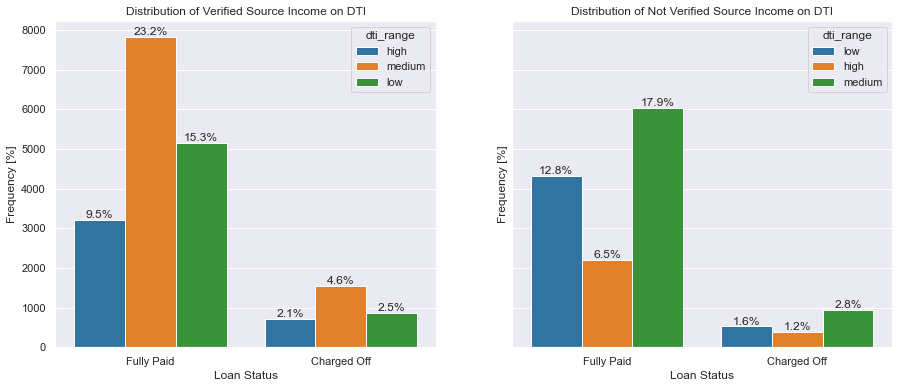

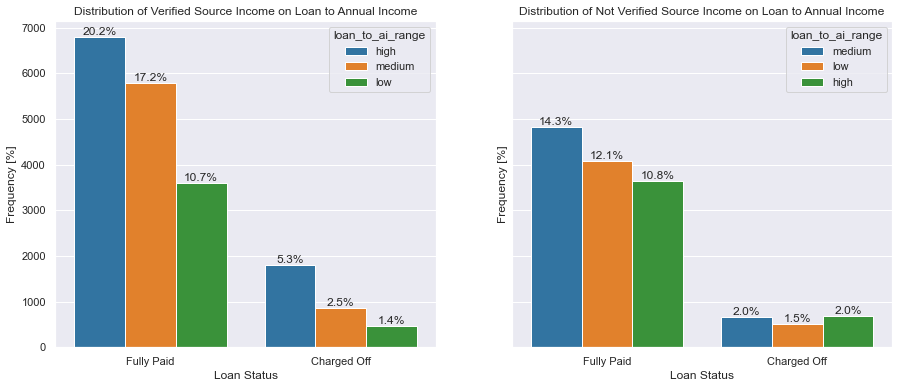

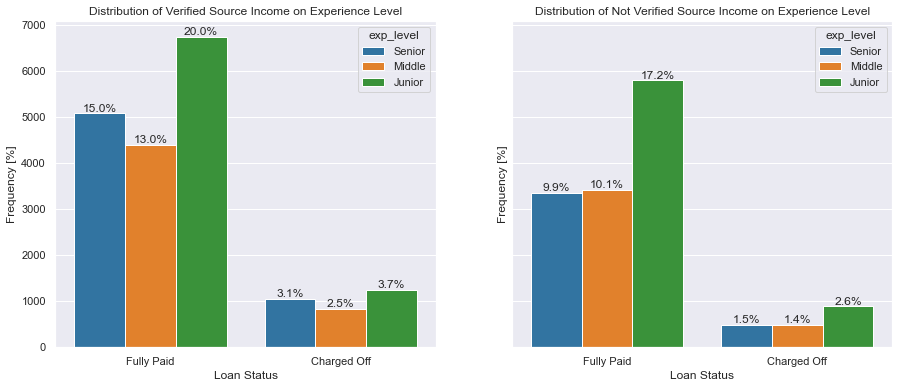

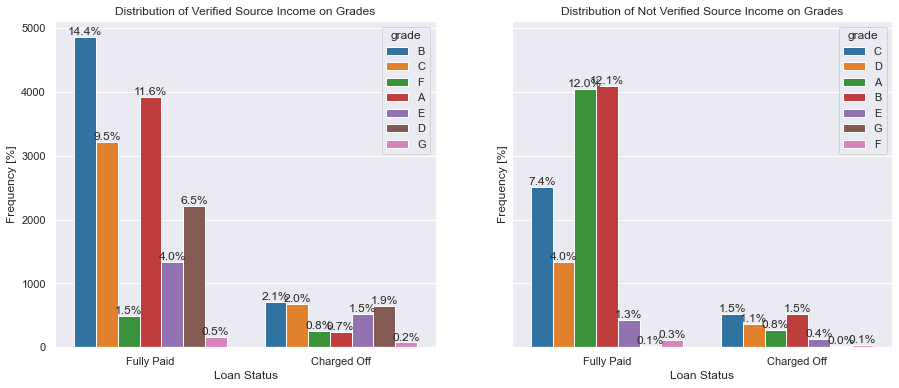

In [75]:
# Generating figures with subplots
figure, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loan_data[loan_data['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on DTI','dti_range','tab10',0, ax1)
create_subplot('loan_status',loan_data[loan_data['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on DTI','dti_range','tab10',0, ax2)

figure, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loan_data[loan_data['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Loan to Annual Income','loan_to_ai_range','tab10',0, ax1)
create_subplot('loan_status',loan_data[loan_data['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Loan to Annual Income','loan_to_ai_range','tab10',0, ax2)   

figure, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loan_data[loan_data['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Experience Level','exp_level','tab10',0, ax1)
create_subplot('loan_status',loan_data[loan_data['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Experience Level','exp_level','tab10',0, ax2)   

figure, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loan_data[loan_data['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Grades','grade','tab10',0, ax1)
create_subplot('loan_status',loan_data[loan_data['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Grades','grade','tab10',0, ax2)

#### People lying in high DTI range For Verified Source Income have high chances to default.
#### People lying in Medium DTI range for Not Verified Source Income have high chances to default.

#### People who have high loan to annual income ratio are at high risk of default for Verified Source Income.
#### People who have medium loan to annual income ratio are at high risk of default for Not Verified Source Income.

#### People with less experience have high chance of default for both Verified and Non verified Source Income.

### Effect of house ownership:

<AxesSubplot:title={'center':'Distribution of Owned Asset on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

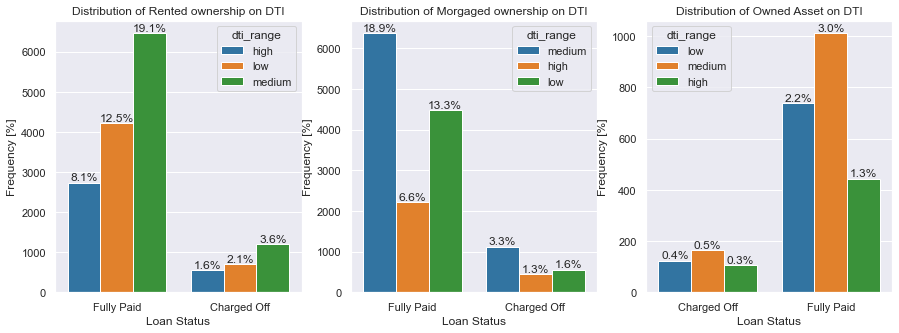

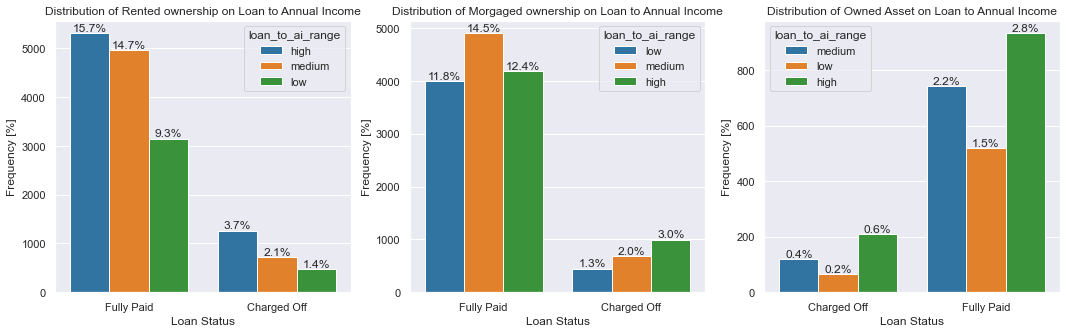

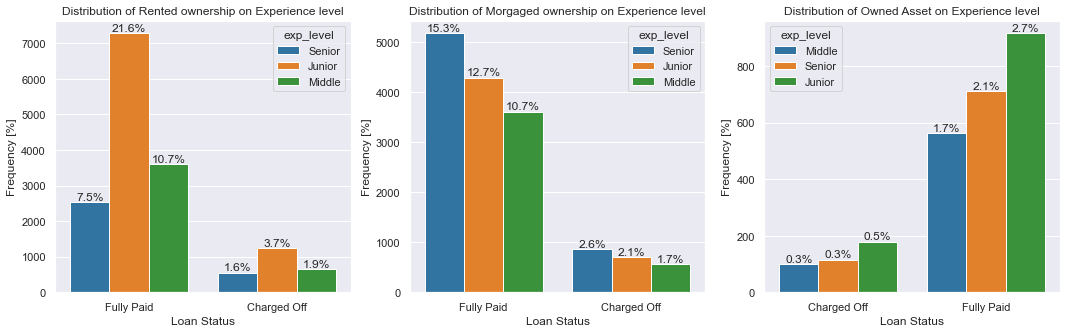

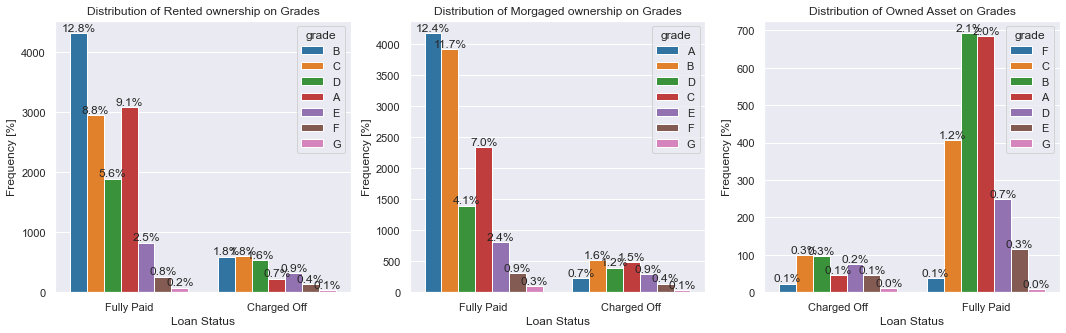

In [76]:
# Generating figures with subplots
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on DTI','dti_range','tab10',0, axs[0])
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on DTI','dti_range','tab10',0, axs[1])   
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on DTI','dti_range','tab10',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Loan to Annual Income','loan_to_ai_range','tab10',0, axs[0])
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Loan to Annual Income','loan_to_ai_range','tab10',0, axs[1])   
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Loan to Annual Income','loan_to_ai_range','tab10',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Experience level','exp_level','tab10',0, axs[0])
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Experience level','exp_level','tab10',0, axs[1])   
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Experience level','exp_level','tab10',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Grades','grade','tab10',0, axs[0])
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Grades','grade','tab10',0, axs[1])   
create_subplot('loan_status',loan_data[loan_data['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Grades','grade','tab10',0, axs[2])

### Validate how variables are corelated to each other:

In [80]:
# Converting the data types into numeric
loan_data['funded_amnt'] = pd.to_numeric(loan_data['funded_amnt'])
loan_data['funded_amnt_inv'] = pd.to_numeric(loan_data['funded_amnt_inv'])
loan_data['installment'] = pd.to_numeric(loan_data['installment'])

In [81]:
# Filtering all numerical values to understand their correlation
df_laons_corr = loan_data.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','loan_to_ai']) 
cor = df_laons_corr.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_float,installment,emp_length,annual_inc,dti,loan_to_ai
loan_amnt,1.000,0.981,0.936,0.308,0.929,0.159,0.261,0.059,0.598
funded_amnt,0.981,1.000,0.955,0.312,0.956,0.158,0.256,0.059,0.585
funded_amnt_inv,0.936,0.955,1.000,0.304,0.902,0.167,0.243,0.068,0.556
int_rate_float,0.308,0.312,0.304,1.000,0.282,0.015,0.051,0.109,0.209
installment,0.929,0.956,0.902,0.282,1.000,0.132,0.259,0.048,0.535
emp_length,0.159,0.158,0.167,0.015,0.132,1.000,0.114,0.047,-0.006
annual_inc,0.261,0.256,0.243,0.051,0.259,0.114,1.000,-0.130,-0.235
dti,0.059,0.059,0.068,0.109,0.048,0.047,-0.130,1.000,0.155
loan_to_ai,0.598,0.585,0.556,0.209,0.535,-0.006,-0.235,0.155,1.000


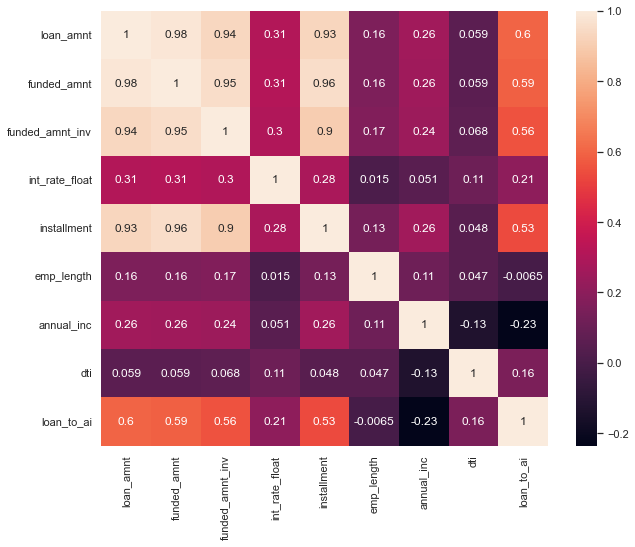

In [89]:
# Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# Project Heatmap
sns.heatmap(cor, annot=True)
plt.show()